# Connectivity, Paths, and Searches

Graph connectivity measures the minimum number of elements (vertices or
edges) that must be removed to disconnect the graph. A graph is
**connected** if there exists a path between every pair of vertices. For
directed graphs, we distinguish between **strongly connected** (path
exists in both directions between any two vertices) and **weakly
connected** (underlying undirected graph is connected) components.

The **connectivity** of a graph $G$, denoted as $\kappa(G)$, represents
the minimum number of vertices whose removal results in a disconnected
or trivial graph. Similarly, **edge-connectivity** $\lambda(G)$ refers
to the minimum number of edges that must be removed to disconnect the
graph.

## Paths

A **path** in a graph $G = (V, E)$ is formally defined as a sequence of
vertices $v_1, v_2, \ldots, v_k$ where each consecutive pair
$(v_i, v_{i+1})$ is connected by an edge $e_i \in E$. The **length** of
a path equals the number of edges it contains, which is $k-1$ for a path
with $k$ vertices.

**Simple paths** contain no repeated vertices, while **cycles** are
paths that begin and end at the same vertex. The **shortest path**
between two vertices represents the path with minimum length, often
computed using algorithms such as Dijkstra’s algorithm for weighted
graphs or breadth-first search for unweighted graphs.

## Graph Search Algorithms

### Depth-First Search (DFS)

Depth-First Search explores a graph by traversing as far as possible
along each branch before backtracking. The algorithm maintains a
**stack** (either explicitly or through recursion) to track the current
exploration path.


In [5]:
def dfs_recursive(graph, vertex, visited=None):
    """
    Recursive implementation of Depth-First Search

    Args:
        graph: Dictionary representing adjacency list
        vertex: Starting vertex
        visited: Set of visited vertices

    Returns:
        List of vertices in DFS order
    """
    if visited is None:
        visited = set()

    visited.add(vertex)
    result = [vertex]

    for neighbor in graph.get(vertex, []):
        if neighbor not in visited:
            result.extend(dfs_recursive(graph, neighbor, visited))

    return result

def dfs_iterative(graph, start):
    """
    Iterative implementation of Depth-First Search using stack
    """
    visited = set()
    stack = [start]
    result = []

    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            visited.add(vertex)
            result.append(vertex)
            # Add neighbors in reverse order to maintain left-to-right traversal
            for neighbor in reversed(graph.get(vertex, [])):
                if neighbor not in visited:
                    stack.append(neighbor)

    return result


In [6]:
from collections import deque

def bfs(graph, start):
    """
    Breadth-First Search implementation

    Args:
        graph: Dictionary representing adjacency list
        start: Starting vertex

    Returns:
        List of vertices in BFS order
    """
    visited = set()
    queue = deque([start])
    result = []

    visited.add(start)

    while queue:
        vertex = queue.popleft()
        result.append(vertex)

        for neighbor in graph.get(vertex, []):
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)

    return result

def bfs_with_distances(graph, start):
    """
    BFS that also computes shortest distances from start vertex
    """
    visited = set()
    queue = deque([(start, 0)])  # (vertex, distance)
    distances = {start: 0}

    visited.add(start)

    while queue:
        vertex, dist = queue.popleft()

        for neighbor in graph.get(vertex, []):
            if neighbor not in visited:
                visited.add(neighbor)
                distances[neighbor] = dist + 1
                queue.append((neighbor, dist + 1))

    return distances


The time complexity of DFS is $O(V + E)$ where $V$ represents the number
of vertices and $E$ the number of edges. The space complexity is $O(V)$
for the recursion stack or explicit stack.

### Breadth-First Search (BFS)

Breadth-First Search explores vertices level by level, visiting all
vertices at distance $k$ before exploring vertices at distance $k+1$.
This algorithm utilizes a **queue** data structure to maintain the
exploration order.

## Visualization Implementation

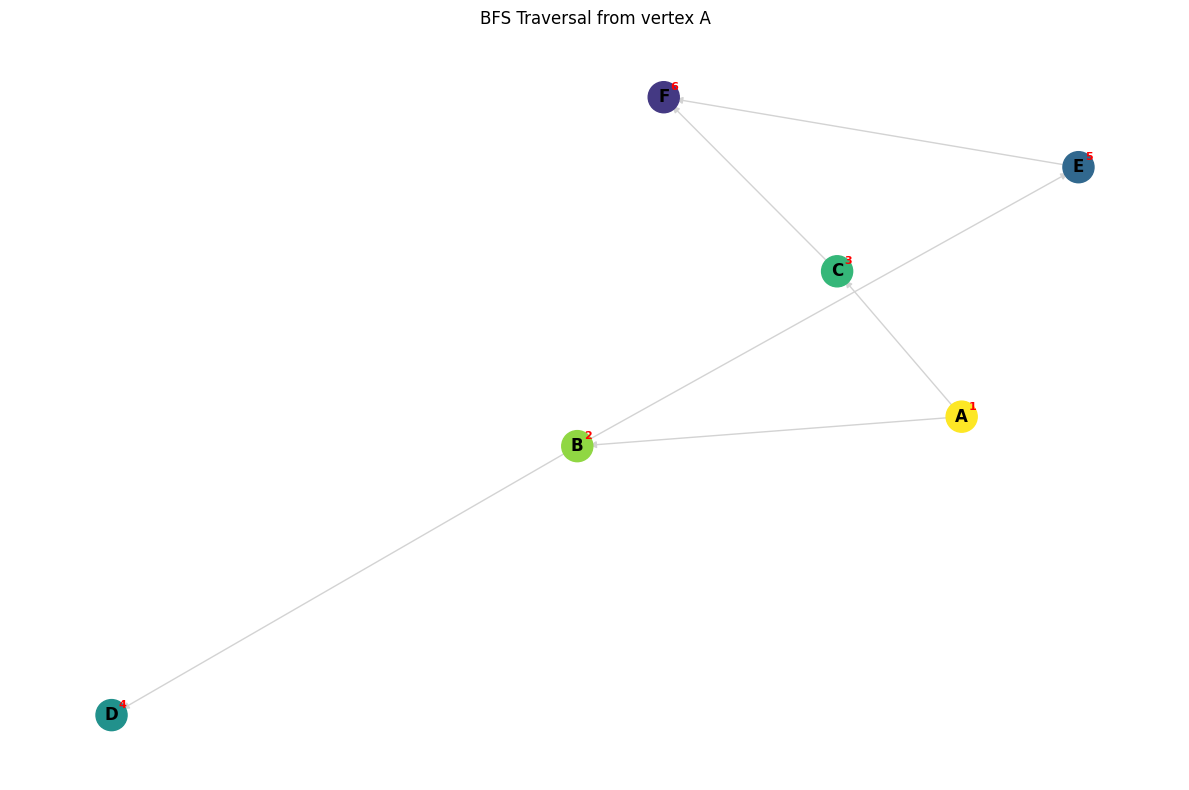

BFS traversal from A: A -> B -> C -> D -> E -> F
DFS traversal from A: A -> B -> D -> E -> F -> C


(['A', 'B', 'C', 'D', 'E', 'F'], ['A', 'B', 'D', 'E', 'F', 'C'])

In [9]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque

def visualize_graph_search(graph_dict, start_vertex, search_type='bfs'):
    """
    Visualize graph and search traversal

    Args:
        graph_dict: Dictionary representation of graph
        start_vertex: Starting vertex for search
        search_type: 'bfs' or 'dfs'
    """
    # Create NetworkX graph
    G = nx.DiGraph() if any(len(neighbors) > 0 for neighbors in graph_dict.values()) else nx.Graph()

    for vertex, neighbors in graph_dict.items():
        for neighbor in neighbors:
            G.add_edge(vertex, neighbor)

    # Perform search
    if search_type == 'bfs':
        traversal_order = bfs(graph_dict, start_vertex)
    else:
        traversal_order = dfs_iterative(graph_dict, start_vertex)

    # Create visualization
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, seed=42)

    # Draw all edges in light gray
    nx.draw_networkx_edges(G, pos, edge_color='lightgray', width=1)

    # Color nodes based on traversal order
    node_colors = []
    for node in G.nodes():
        if node in traversal_order:
            # Color intensity based on traversal order
            intensity = 1 - (traversal_order.index(node) / len(traversal_order))
            node_colors.append(plt.cm.viridis(intensity))
        else:
            node_colors.append('lightgray')

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=500)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

    # Add traversal order annotations
    for i, vertex in enumerate(traversal_order):
        x, y = pos[vertex]
        plt.annotate(f'{i+1}', (x, y), xytext=(5, 5), textcoords='offset points',
                    fontsize=8, color='red', weight='bold')

    plt.title(f'{search_type.upper()} Traversal from vertex {start_vertex}')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Example usage
example_graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}

# Visualize BFS traversal
visualize_graph_search(example_graph, 'A', 'bfs')

# Compare BFS and DFS
def compare_searches(graph_dict, start):
    """Compare BFS and DFS traversal orders"""
    bfs_order = bfs(graph_dict, start)
    dfs_order = dfs_iterative(graph_dict, start)

    print(f"BFS traversal from {start}: {' -> '.join(bfs_order)}")
    print(f"DFS traversal from {start}: {' -> '.join(dfs_order)}")

    return bfs_order, dfs_order

compare_searches(example_graph, 'A')

BFS guarantees finding the shortest path in unweighted graphs and has
the same time complexity $O(V + E)$ and space complexity $O(V)$ as DFS.


## Applications and Properties

**DFS Applications:**

-   Topological sorting in directed acyclic graphs
-   Detecting cycles in graphs
-   Finding strongly connected components
-   Maze solving and puzzle games

**BFS Applications:**

-   Finding shortest paths in unweighted graphs
-   Level-order traversal of trees
-   Social network analysis (degrees of separation)
-   Web crawling algorithms

The choice between DFS and BFS depends on the specific problem
requirements. DFS uses less memory for sparse graphs but may not find
optimal solutions, while BFS guarantees shortest paths but requires more
memory storage for the queue structure.